# No-Show-Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

In [2]:
df = pd.read_csv('CHLA_clean_data_until_2023.csv')

df


,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE,IS_NOSHOW
0,1946298,CONFIRMED,12/26/23 10:30,6/6/23 10:32,91387,VALENCIA CARE CENTER,22576917,77137126,202,Y,...,5,0,1,4,12,10,14,Non-Hispanic,European,N
1,4464320,RESCHEDULED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,21812159,74489619,363,Y,...,2,0,1,4,12,10,3,Others,Other,N
2,4464320,CONFIRMED,12/26/23 10:00,12/27/22 10:19,91354,VALENCIA CARE CENTER,22496669,76863542,363,Y,...,2,0,1,4,12,10,3,Others,Other,N
3,4146637,CONFIRMED,12/21/23 10:30,1/23/23 10:59,91350,VALENCIA CARE CENTER,22466003,76767204,331,Y,...,4,0,3,3,12,10,12,Non-Hispanic,European,N
4,4460795,CONFIRMED,12/18/23 9:00,1/9/23 10:59,91402,VALENCIA CARE CENTER,21862889,74656637,342,Y,...,3,0,0,3,12,9,13,Others,Other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,4109677,CHECKED OUT,4/24/18 10:30,4/9/18 15:15,91108,ARCADIA CARE CENTER,14657077,45785685,14,N,...,3,0,1,4,4,10,9,Others,Other,N
21056,1893524,CHECKED OUT,4/17/18 11:30,1/16/18 11:20,90041,ARCADIA CARE CENTER,14684208,45874999,91,N,...,10,3,1,3,4,11,20,Others,Other,N
21057,4174648,RESCHEDULED,4/4/18 8:40,3/5/18 11:52,92410,ARCADIA CARE CENTER,14526629,45343418,29,N,...,0,0,2,1,4,8,20,Others,Other,N
21058,1352218,CHECKED OUT,3/20/18 12:10,3/20/18 9:15,91350,ARCADIA CARE CENTER,14583939,45539383,0,N,...,1,0,1,3,3,12,24,Non-Hispanic,Other,N


In [3]:
df.dtypes

MRN                                          int64
APPT_STATUS                                 object
APPT_DATE                                   object
BOOK_DATE                                   object
ZIPCODE                                     object
CLINIC                                      object
SCHEDULE_ID                                  int64
APPT_ID                                      int64
LEAD_TIME                                    int64
IS_REPEAT                                   object
APPT_TYPE_STANDARDIZE                       object
APPT_NUM                                     int64
TOTAL_NUMBER_OF_CANCELLATIONS                int64
TOTAL_NUMBER_OF_RESCHEDULED                  int64
TOTAL_NUMBER_OF_NOT_CHECKOUT_APPOINTMENT     int64
TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT          int64
TOTAL_NUMBER_OF_NOSHOW                       int64
DAY_OF_WEEK                                  int64
WEEK_OF_MONTH                                int64
NUM_OF_MONTH                   

In [4]:
# typecast columns to their correct data type
df['MRN'] = df['MRN'].astype(str)
df['APPT_DATE'] = pd.to_datetime(df['APPT_DATE'], errors='coerce')
df['BOOK_DATE'] = pd.to_datetime(df['BOOK_DATE'], errors='coerce')
df['SCHEDULE_ID'] = df['SCHEDULE_ID'].astype(str)
df['APPT_ID'] = df['APPT_ID'].astype(str)
df['WEEK_OF_MONTH'] = df['WEEK_OF_MONTH'].astype(str)

/var/folders/_6/zbtvk12j6_v27g0v5ghn4ty40000gn/T/ipykernel_3608/2222530430.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['APPT_DATE'] = pd.to_datetime(df['APPT_DATE'], errors='coerce')
/var/folders/_6/zbtvk12j6_v27g0v5ghn4ty40000gn/T/ipykernel_3608/2222530430.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['BOOK_DATE'] = pd.to_datetime(df['BOOK_DATE'], errors='coerce')


In [5]:
# Check for NaT values in 'APPT_DATE'
nat_in_appt_date = df['APPT_DATE'].isna()

# Check for NaT values in 'BOOK_DATE'
nat_in_book_date = df['BOOK_DATE'].isna()

# You can then sum up the boolean values to get the total count of NaT values
nat_count_appt_date = nat_in_appt_date.sum()
nat_count_book_date = nat_in_book_date.sum()

print(f"Total NaT in APPT_DATE: {nat_count_appt_date}")
print(f"Total NaT in BOOK_DATE: {nat_count_book_date}")


Total NaT in APPT_DATE: 0
Total NaT in BOOK_DATE: 0


In [6]:
df

,MRN,APPT_STATUS,APPT_DATE,BOOK_DATE,ZIPCODE,CLINIC,SCHEDULE_ID,APPT_ID,LEAD_TIME,IS_REPEAT,...,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,TOTAL_NUMBER_OF_NOSHOW,DAY_OF_WEEK,WEEK_OF_MONTH,NUM_OF_MONTH,HOUR_OF_DAY,AGE,ETHNICITY_STANDARDIZE,RACE_STANDARDIZE,IS_NOSHOW
0,1946298,CONFIRMED,2023-12-26 10:30:00,2023-06-06 10:32:00,91387,VALENCIA CARE CENTER,22576917,77137126,202,Y,...,5,0,1,4,12,10,14,Non-Hispanic,European,N
1,4464320,RESCHEDULED,2023-12-26 10:00:00,2022-12-27 10:19:00,91354,VALENCIA CARE CENTER,21812159,74489619,363,Y,...,2,0,1,4,12,10,3,Others,Other,N
2,4464320,CONFIRMED,2023-12-26 10:00:00,2022-12-27 10:19:00,91354,VALENCIA CARE CENTER,22496669,76863542,363,Y,...,2,0,1,4,12,10,3,Others,Other,N
3,4146637,CONFIRMED,2023-12-21 10:30:00,2023-01-23 10:59:00,91350,VALENCIA CARE CENTER,22466003,76767204,331,Y,...,4,0,3,3,12,10,12,Non-Hispanic,European,N
4,4460795,CONFIRMED,2023-12-18 09:00:00,2023-01-09 10:59:00,91402,VALENCIA CARE CENTER,21862889,74656637,342,Y,...,3,0,0,3,12,9,13,Others,Other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,4109677,CHECKED OUT,2018-04-24 10:30:00,2018-04-09 15:15:00,91108,ARCADIA CARE CENTER,14657077,45785685,14,N,...,3,0,1,4,4,10,9,Others,Other,N
21056,1893524,CHECKED OUT,2018-04-17 11:30:00,2018-01-16 11:20:00,90041,ARCADIA CARE CENTER,14684208,45874999,91,N,...,10,3,1,3,4,11,20,Others,Other,N
21057,4174648,RESCHEDULED,2018-04-04 08:40:00,2018-03-05 11:52:00,92410,ARCADIA CARE CENTER,14526629,45343418,29,N,...,0,0,2,1,4,8,20,Others,Other,N
21058,1352218,CHECKED OUT,2018-03-20 12:10:00,2018-03-20 09:15:00,91350,ARCADIA CARE CENTER,14583939,45539383,0,N,...,1,0,1,3,3,12,24,Non-Hispanic,Other,N


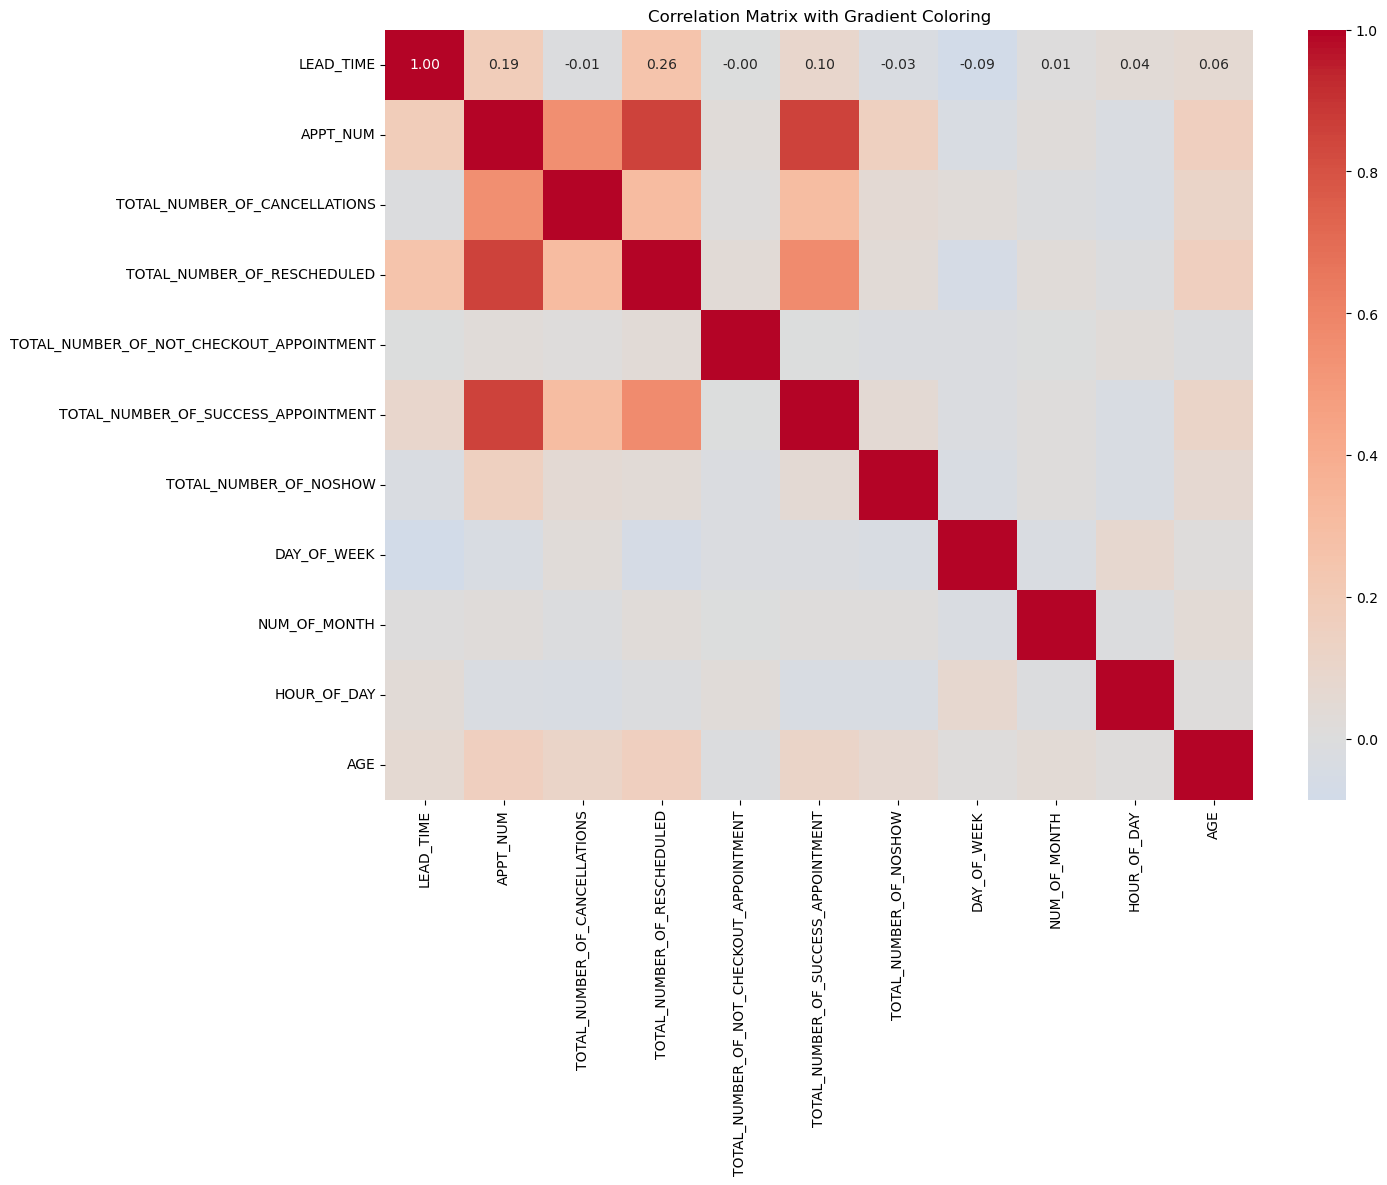

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Set the size of the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap with gradient coloring
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Display the heatmap
plt.title('Correlation Matrix with Gradient Coloring')
plt.show()

In [8]:
df = df[['AGE', 'CLINIC', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'LEAD_TIME', 'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOSHOW',
         'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'HOUR_OF_DAY', 'NUM_OF_MONTH', 'IS_NOSHOW']]


In [9]:
# Create a copy of the DataFrame to avoid changing the original one
df_encoded = df.copy()

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
object_cols = ['CLINIC', 'IS_NOSHOW']

# Apply the encoder to each column
for col in object_cols:
    df_encoded[col] = le.fit_transform(df[col])

In [10]:
df_encoded

,AGE,CLINIC,TOTAL_NUMBER_OF_CANCELLATIONS,LEAD_TIME,TOTAL_NUMBER_OF_RESCHEDULED,TOTAL_NUMBER_OF_NOSHOW,TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT,HOUR_OF_DAY,NUM_OF_MONTH,IS_NOSHOW
0,14,5,1,202,2,0,5,10,12,0
1,3,5,0,363,1,0,2,10,12,0
2,3,5,0,363,1,0,2,10,12,0
3,12,5,2,331,8,0,4,10,12,0
4,13,5,1,342,1,0,3,9,12,0
...,...,...,...,...,...,...,...,...,...,...
21055,9,0,0,14,0,0,3,10,4,0
21056,20,0,5,91,3,3,10,11,4,0
21057,20,0,0,29,1,0,0,8,4,0
21058,24,0,0,0,0,0,1,12,3,0


In [11]:
# Serialize the LabelEncoder
with open('label_encoderV2.pkl', 'wb') as file:
    pickle.dump(le, file)

print("LabelEncoder has been serialized as label_encoder.pkl")

LabelEncoder has been serialized as label_encoder.pkl


In [12]:
# Features and label

X = df_encoded.drop('IS_NOSHOW', axis=1)  # All columns except 'IS_NOSHOW'
y = df_encoded['IS_NOSHOW']  # Only the 'IS_NOSHOW' column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of the data will be used for testing


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test)

# Calculate accuracy and ROC-AUC
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

(log_reg_accuracy, log_reg_roc_auc)

(0.9506172839506173, 0.9548161845123333)

# Decision Tree Classifier

In [14]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
dt_predictions = decision_tree.predict(X_test)

# Calculate accuracy and ROC-AUC
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree ROC-AUC: {dt_roc_auc}')

Decision Tree Accuracy: 0.9482431149097815
Decision Tree ROC-AUC: 0.7390330457898203


# Random Forest Classifier

In [15]:
# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
rf_predictions = random_forest.predict(X_test)

# Calculate accuracy and ROC-AUC
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest ROC-AUC: {rf_roc_auc}')


Random Forest Accuracy: 0.959639126305793
Random Forest ROC-AUC: 0.9639863403882493


# Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predict on the test set
gbm_predictions = gbm.predict(X_test)

# Calculate accuracy and ROC-AUC
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
gbm_roc_auc = roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1])

print(f'GBM Accuracy: {gbm_accuracy}')
print(f'GBM ROC-AUC: {gbm_roc_auc}')

GBM Accuracy: 0.9653371320037987
GBM ROC-AUC: 0.9709308927395363


In [17]:
pickle_out = open("model_V2.pkl", "wb")
pickle.dump(gbm, pickle_out)
pickle_out.close()

# Test Case

In [18]:
df_encoded.columns

Index(['AGE', 'CLINIC', 'TOTAL_NUMBER_OF_CANCELLATIONS', 'LEAD_TIME',
       'TOTAL_NUMBER_OF_RESCHEDULED', 'TOTAL_NUMBER_OF_NOSHOW',
       'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT', 'HOUR_OF_DAY', 'NUM_OF_MONTH',
       'IS_NOSHOW'],
      dtype='object')

In [19]:
for i, col in enumerate(df_encoded.columns, 1):
    print(f"Column {i}: {col}")


Column 1: AGE
Column 2: CLINIC
Column 3: TOTAL_NUMBER_OF_CANCELLATIONS
Column 4: LEAD_TIME
Column 5: TOTAL_NUMBER_OF_RESCHEDULED
Column 6: TOTAL_NUMBER_OF_NOSHOW
Column 7: TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT
Column 8: HOUR_OF_DAY
Column 9: NUM_OF_MONTH
Column 10: IS_NOSHOW


In [20]:
def predict_noshow(age, clinic, total_cancellations, lead_time, total_rescheduled, 
                   total_noshow, total_success, hour_of_day, num_of_month):

    # Create a DataFrame for the input features with the same feature names as during model training
    input_df = pd.DataFrame({
    'AGE': [age],
    'CLINIC': [clinic],
    'TOTAL_NUMBER_OF_CANCELLATIONS': [total_cancellations],
    'LEAD_TIME': [lead_time],
    'TOTAL_NUMBER_OF_RESCHEDULED': [total_rescheduled],
    'TOTAL_NUMBER_OF_NOSHOW': [total_noshow],
    'TOTAL_NUMBER_OF_SUCCESS_APPOINTMENT': [total_success],
    'HOUR_OF_DAY': [hour_of_day],
    'NUM_OF_MONTH': [num_of_month]
})

    
    # Predict the outcome using the DataFrame
    prediction = gbm.predict(input_df)
    
    # Predict the probability of the outcome
    probability = gbm.predict_proba(input_df)[0, 1]  # Probability of 'Yes'
    
    # Convert the numerical prediction to 'Yes' or 'No'
    prediction_text = 'Yes' if prediction[0] == 1 else 'No'
    
    return prediction_text, probability

# Example usage
age = 20
clinic = 0
total_cancellations = 0
lead_time = 200
total_rescheduled = 0
total_noshow = 1
total_success = 1
hour_of_day = 10
num_of_month = 4

prediction, probability = predict_noshow(age, clinic, total_cancellations, lead_time, total_rescheduled, 
                   total_noshow, total_success, hour_of_day, num_of_month)

if prediction == 'Yes':
    answer = "Patient will No-Show"
    print(f'Prediction: {answer}, Probability: {probability:.2f}')
    
elif prediction == 'No':
    answer = "Patient will Show"
    print(f'Prediction: {answer}, Probability: {probability:.2f}')


Prediction: Patient will No-Show, Probability: 0.75
